# Getting only face from the whole image

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import dlib
from automakeup import dlib_predictor_path
from automakeup.face import extract as face_extraction, bounding
from imagine.color.conversion import BgrToRgb
from importlib import resources
from mtcnn import MTCNN

In [2]:
with dlib_predictor_path() as p:
    predictor = dlib.shape_predictor(str(p))

In [3]:
mtcnn = MTCNN()

In [4]:
extractor1 = face_extraction.SimpleFaceExtractor(512, interpolation=cv2.INTER_CUBIC)
extractor2 = face_extraction.AligningDlibFaceExtractor(512, predictor)
bb_finder1 = bounding.DlibBoundingBoxFinder()
bb_finder2 = bounding.MTCNNBoundingBoxFinder(mtcnn)

In [5]:
def show(image):
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))

    bb = bb_finder1.find(image)

    axs[0][0].imshow(extractor1.extract(image, bb))
    axs[0][0].title.set_text("2 x bounding box (DLIB BB)")
    axs[0][0].set_axis_off()
    axs[0][1].imshow(extractor2.extract(image, bb))
    axs[0][1].title.set_text("Align with Dlib (DLIB BB)")
    axs[0][1].set_axis_off()

    bb = bb_finder2.find(image)

    axs[1][0].imshow(extractor1.extract(image, bb))
    axs[1][0].title.set_text("2 x bounding box (MTCNN BB)")
    axs[1][0].set_axis_off()
    axs[1][1].imshow(extractor2.extract(image, bb))
    axs[1][1].title.set_text("Align with Dlib (MTCNN BB)")
    axs[1][1].set_axis_off()
    
    plt.tight_layout()
    plt.show()

In [6]:
image_paths = ["faces/" + f for f in os.listdir("faces")]

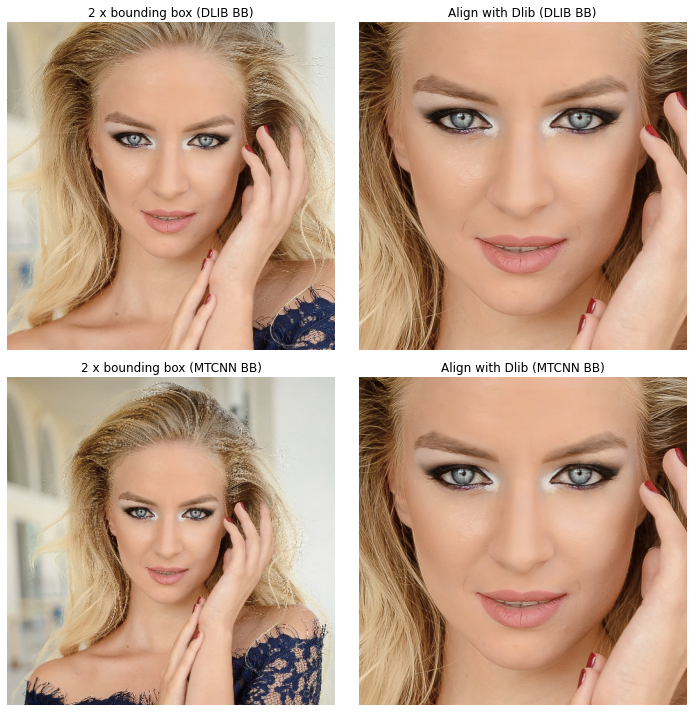

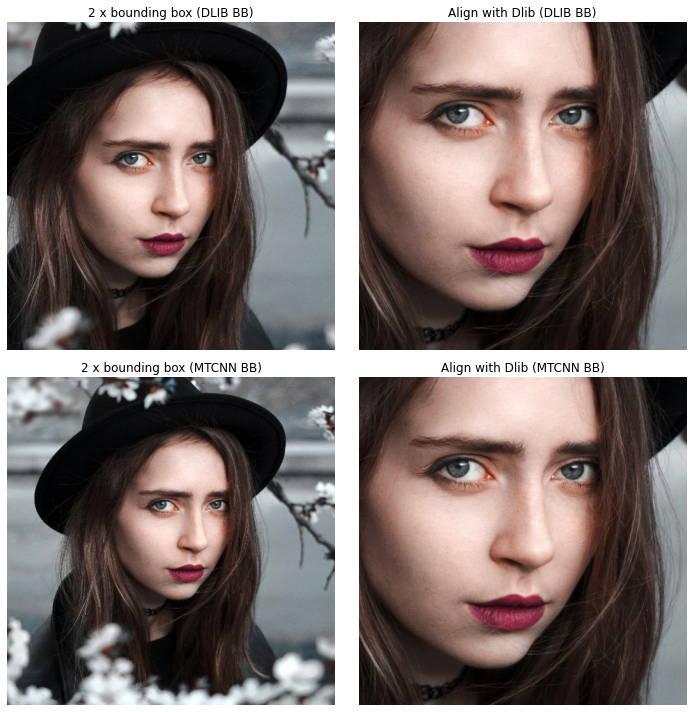

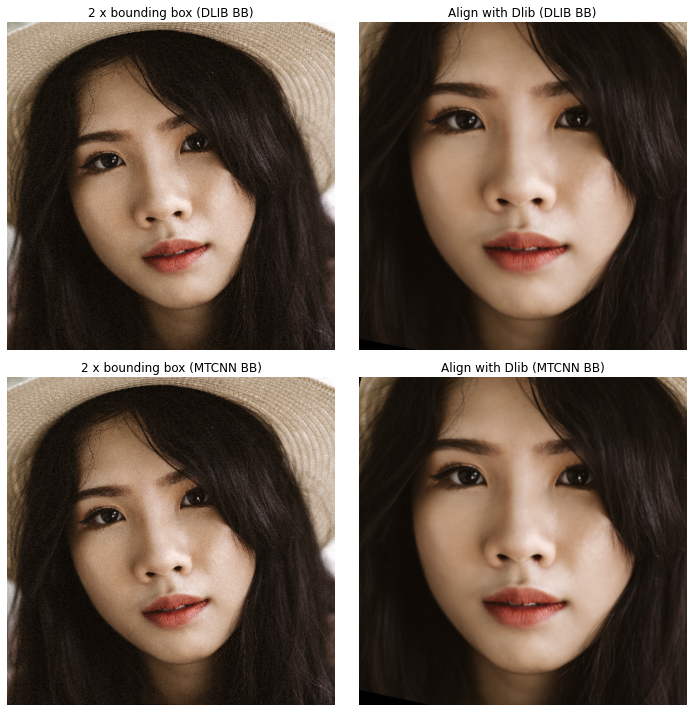

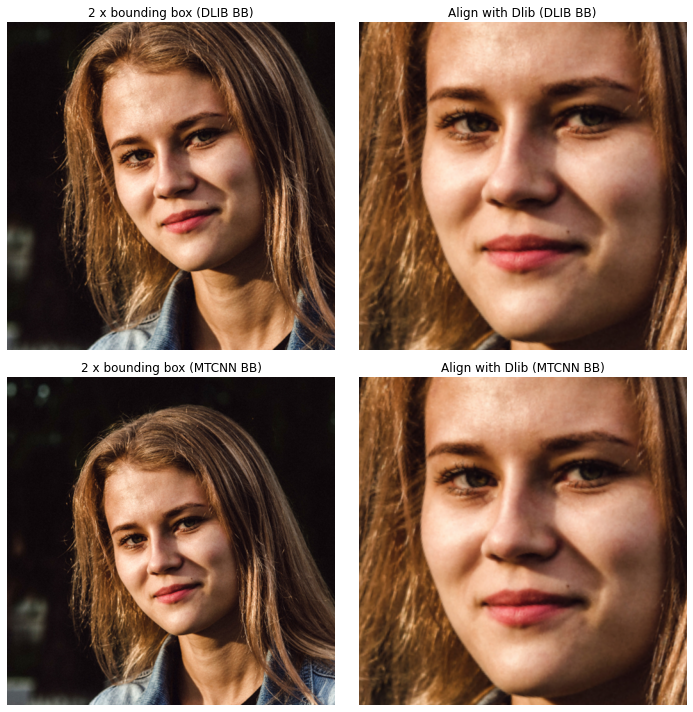

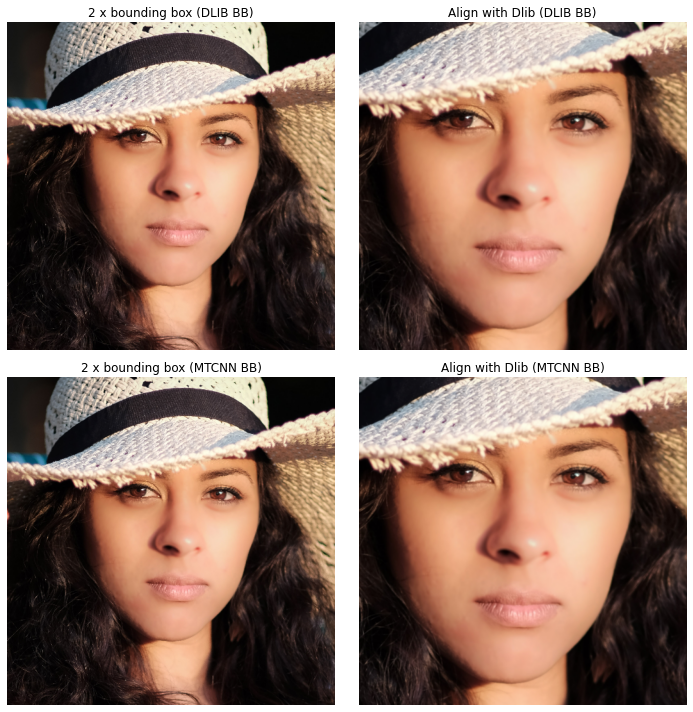

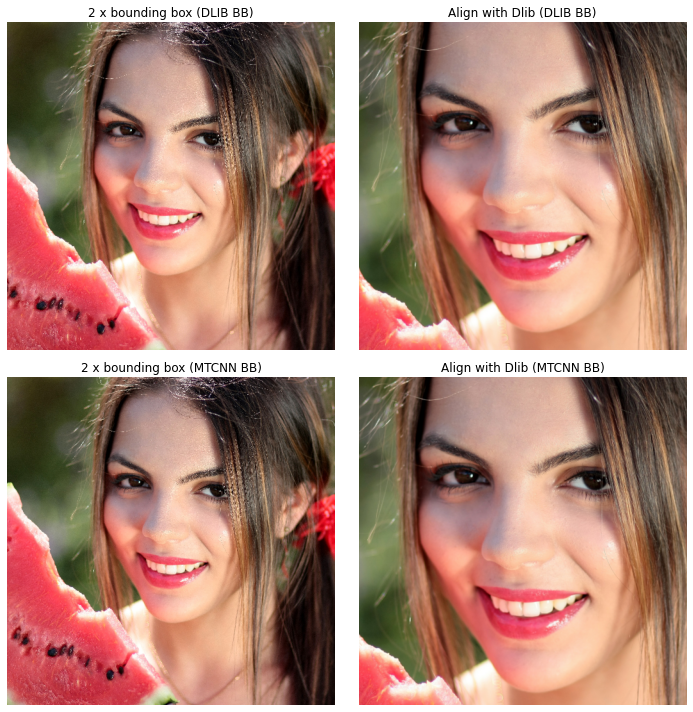

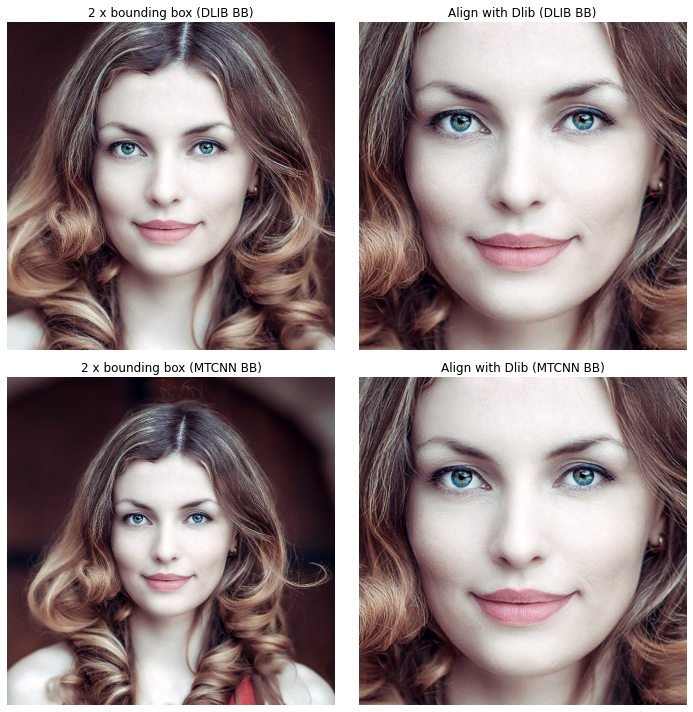

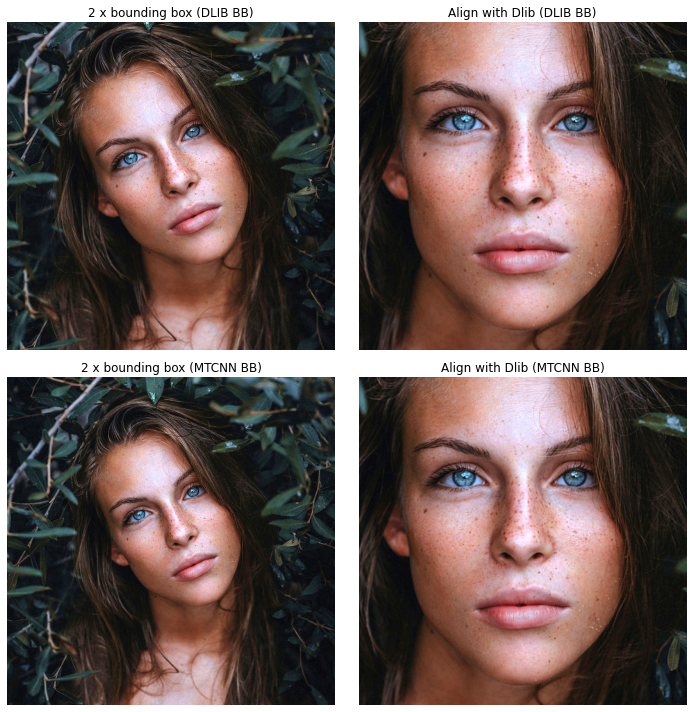

In [7]:
for path in image_paths:
    image = BgrToRgb(cv2.imread(path))
    show(image)